# Film Data Analysis

## Initial Setup

In [134]:
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats



In [135]:
# will be looking at a lot of tables, so make a report
def df_report(df):
    print(df.info())
    print('===========================================================\n')
    print(df.describe())
    print('===========================================================\n')
    print(df.head())

In [136]:
films = pd.read_csv('Data\\Reduced_Data\\films_2010.csv')

In [137]:
films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63849 entries, 0 to 63848
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         63849 non-null  int64  
 1   primary_title      63849 non-null  object 
 2   year               63849 non-null  float64
 3   runtime_minutes    62741 non-null  float64
 4   genres             62322 non-null  object 
 5   movie_id           62741 non-null  object 
 6   writer             54128 non-null  object 
 7   director           62264 non-null  object 
 8   production_budget  2440 non-null   float64
 9   domestic_gross     4564 non-null   float64
 10  worldwide_gross    3372 non-null   float64
 11  studio             3381 non-null   object 
 12  foreign_gross      3398 non-null   float64
 13  averagerating      62783 non-null  float64
 14  numvotes           62779 non-null  float64
 15  log_numvotes       62115 non-null  float64
 16  actors             627

#### Get rid of what we don't need for the following analyses

In [138]:
drop_columns= ['Unnamed: 0', 'domestic_gross', 'worldwide_gross', 'foreign_gross', 'log_numvotes', 
              'ww_netprofit', 'ww_ppratio', 'f_netprofit', 'f_ppratio']
films = films.drop(drop_columns, axis=1)

In [139]:
films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63849 entries, 0 to 63848
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   primary_title      63849 non-null  object 
 1   year               63849 non-null  float64
 2   runtime_minutes    62741 non-null  float64
 3   genres             62322 non-null  object 
 4   movie_id           62741 non-null  object 
 5   writer             54128 non-null  object 
 6   director           62264 non-null  object 
 7   production_budget  2440 non-null   float64
 8   studio             3381 non-null   object 
 9   averagerating      62783 non-null  float64
 10  numvotes           62779 non-null  float64
 11  actors             62741 non-null  object 
 12  d_netprofit        2440 non-null   float64
 13  d_ppratio          2440 non-null   float64
dtypes: float64(7), object(7)
memory usage: 6.8+ MB


#### Get rid of the null data in the financial columns

In [140]:
films = films[films.d_netprofit.notna()]

In [141]:
films.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2440 entries, 14 to 63144
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   primary_title      2440 non-null   object 
 1   year               2440 non-null   float64
 2   runtime_minutes    2036 non-null   float64
 3   genres             2035 non-null   object 
 4   movie_id           2036 non-null   object 
 5   writer             1947 non-null   object 
 6   director           2030 non-null   object 
 7   production_budget  2440 non-null   float64
 8   studio             1235 non-null   object 
 9   averagerating      2019 non-null   float64
 10  numvotes           2019 non-null   float64
 11  actors             2036 non-null   object 
 12  d_netprofit        2440 non-null   float64
 13  d_ppratio          2440 non-null   float64
dtypes: float64(7), object(7)
memory usage: 285.9+ KB


In [142]:
df_report(films)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2440 entries, 14 to 63144
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   primary_title      2440 non-null   object 
 1   year               2440 non-null   float64
 2   runtime_minutes    2036 non-null   float64
 3   genres             2035 non-null   object 
 4   movie_id           2036 non-null   object 
 5   writer             1947 non-null   object 
 6   director           2030 non-null   object 
 7   production_budget  2440 non-null   float64
 8   studio             1235 non-null   object 
 9   averagerating      2019 non-null   float64
 10  numvotes           2019 non-null   float64
 11  actors             2036 non-null   object 
 12  d_netprofit        2440 non-null   float64
 13  d_ppratio          2440 non-null   float64
dtypes: float64(7), object(7)
memory usage: 285.9+ KB
None

              year  runtime_minutes  production_budget  average

#### Loop through all the data and capture 'group' for the top 12 distinct genre catagories, such that if a movie contains the genre in its 'genres' field then it will be part of that group.  Note that a movie can belong to multiple groups.

#### Will use these group to perform statistical testing agains the dependent variables further below

In [143]:
#genre_groups = ['Documentary', 'Drama', 'Comedy', 'Thriller', 'Horror', 'Biography', 'Action', 'Romance', 
#          'Crime', 'History', 'Adventure', 'Family']

#df_groups = [films[films['genres'].str.contains(group, na=False)].assign(genre_group=group) for group in groups]

In [144]:
#combined_df = pd.concat(df_groups, ignore_index=True)

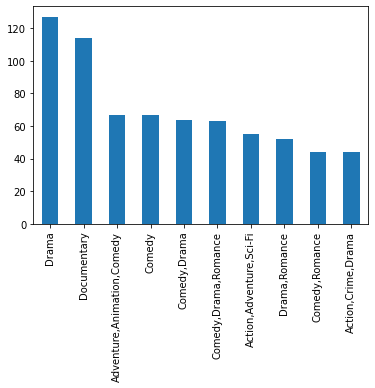

In [233]:
top_ten_genres = films.genres.value_counts().head(10)
top_ten_genres.plot(kind='bar');
top_ten_list = list(top_ten_genres.index)
films_top10 = films[films['genres'].isin(top_ten_list)]

In [234]:
df_report(films_top10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 697 entries, 42 to 62101
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   primary_title      697 non-null    object 
 1   year               697 non-null    float64
 2   runtime_minutes    697 non-null    float64
 3   genres             697 non-null    object 
 4   movie_id           697 non-null    object 
 5   writer             640 non-null    object 
 6   director           695 non-null    object 
 7   production_budget  697 non-null    float64
 8   studio             374 non-null    object 
 9   averagerating      670 non-null    float64
 10  numvotes           670 non-null    float64
 11  actors             697 non-null    object 
 12  d_netprofit        697 non-null    float64
 13  d_ppratio          697 non-null    float64
dtypes: float64(7), object(7)
memory usage: 81.7+ KB
None

              year  runtime_minutes  production_budget  averagera

---

## Analyzing d_ppratio by genre group

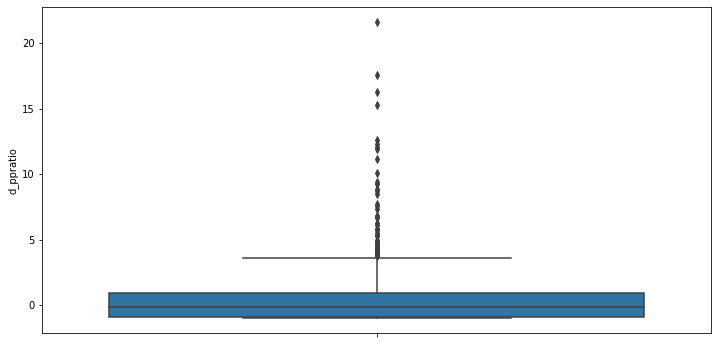

In [235]:
plt.figure(figsize=(12, 6))
sns.boxplot(y='d_ppratio', data=films_top10);

In [146]:
combined_df = combined_df.query('d_ppratio < 10')

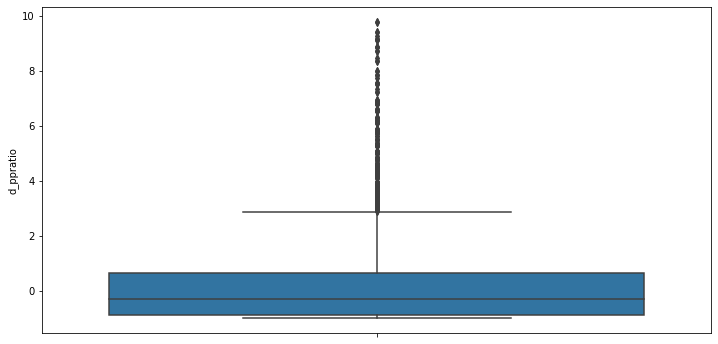

In [147]:
plt.figure(figsize=(12, 6))
sns.boxplot(y='d_ppratio', data=combined_df);

### Going to leave the outliers like this for now, the data is not normal, it is skewed positive.  Lets look at the risiduals

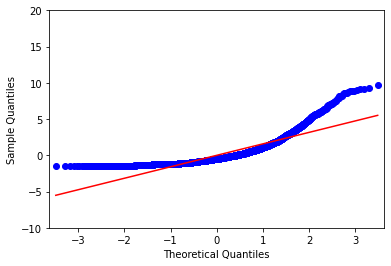

In [149]:
model = ols('d_ppratio ~ C(genre_group)', data=combined_df).fit()

residuals = model.resid
# Create a Q-Q plot
fig = sm.qqplot(residuals, line='s')  # 's' indicates a standardized line
plt.gca().set_ylim([-10, 20])   # set all qq plots to same y-scale for comparison

# Display the plot
plt.show()

### Ouch, very not normal residuals!  Lets try log transformation

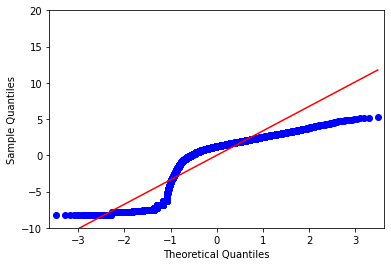

In [150]:
combined_df['log_d_ppratio'] = np.log(combined_df['d_ppratio'] + 1.0001)  #adding a constant to make all values positive

model = ols('log_d_ppratio ~ C(genre_group)', data=combined_df).fit()

residuals = model.resid
# Create a Q-Q plot
fig = sm.qqplot(residuals, line='s')  # 's' indicates a standardized line
plt.gca().set_ylim([-10, 20])  # set all qq plots to same y-scale for comparison

# Display the plot
plt.show()

### Not much better, how about square root transformation ?

In [152]:
combined_df['sqrt_d_ppratio'] = np.sqrt(combined_df['d_ppratio'] + 1.00001)

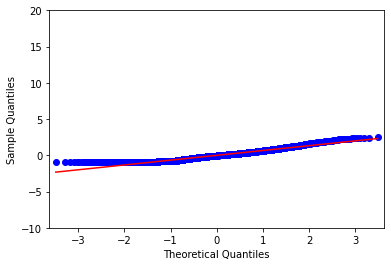

In [153]:
model = ols('sqrt_d_ppratio ~ C(genre_group)', data=combined_df).fit()

residuals = model.resid
# Create a Q-Q plot
fig = sm.qqplot(residuals, line='s')  # 's' indicates a standardized line
plt.gca().set_ylim([-10, 20])  # set all qq plots to same y-scale for comparison

# Display the plot
plt.show()

### Better than untransformed and log, how about Box-Cox?

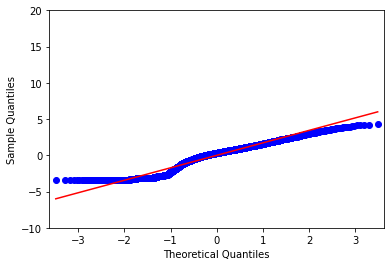

In [154]:
# Apply Box-Cox Transformation to 'd_ppratio'
combined_df['box_cox_d_ppratio'], fitted_lambda = stats.boxcox(combined_df['d_ppratio'] + 1.00001)

model = ols('box_cox_d_ppratio ~ C(genre_group)', data=combined_df).fit()

residuals = model.resid
# Create a Q-Q plot
fig = sm.qqplot(residuals, line='s')  # 's' indicates a standardized line
plt.gca().set_ylim([-10, 20]) # set all qq plots to same y-scale for comparison

# Display the plot
plt.show()

### Sqrt looks like the best candidate, lets try the model

In [155]:
# Fit the model
model = ols('sqrt_d_ppratio ~ C(genre_group)', data=combined_df).fit()

# Perform ANOVA
anova_results = sm.stats.anova_lm(model, typ=2)

print(anova_results)
print(model.summary())

                     sum_sq      df         F    PR(>F)
C(genre_group)    16.998045    11.0  3.479798  0.000074
Residual        1796.710590  4046.0       NaN       NaN
                            OLS Regression Results                            
Dep. Variable:         sqrt_d_ppratio   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     3.480
Date:                Tue, 18 Jun 2024   Prob (F-statistic):           7.41e-05
Time:                        11:00:14   Log-Likelihood:                -4105.0
No. Observations:                4058   AIC:                             8234.
Df Residuals:                    4046   BIC:                             8310.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                    coef  

### Prob(Omnibus) and Prob(JB) are still 0, indicating the residuals are very not normal.  Lets take a look at the outliers for sqrt(d_ppratio)

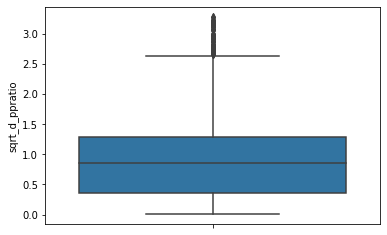

In [156]:
sns.boxplot(y='sqrt_d_ppratio', data=combined_df);

### Remove the outliers...

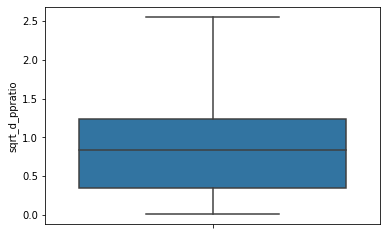

In [157]:
sns.boxplot(y='sqrt_d_ppratio', data=combined_df.query('sqrt_d_ppratio < 2.57'));

                     sum_sq      df         F        PR(>F)
C(genre_group)    21.524789    11.0  5.238516  2.962325e-08
Residual        1481.462316  3966.0       NaN           NaN
                            OLS Regression Results                            
Dep. Variable:         sqrt_d_ppratio   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     5.239
Date:                Tue, 18 Jun 2024   Prob (F-statistic):           2.96e-08
Time:                        11:00:31   Log-Likelihood:                -3679.9
No. Observations:                3978   AIC:                             7384.
Df Residuals:                    3966   BIC:                             7459.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              

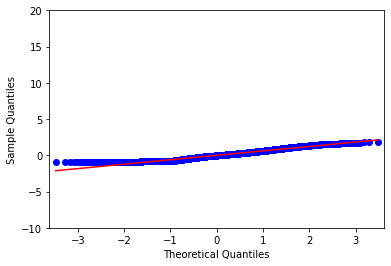

In [159]:
# trim off the outliers
d_ppratio_xform = combined_df.query('sqrt_d_ppratio < 2.57')

# Fit the model
model = ols('sqrt_d_ppratio ~ C(genre_group)', data=d_ppratio_xform).fit()
residuals = model.resid
# Create a Q-Q plot
fig = sm.qqplot(residuals, line='s')  # 's' indicates a standardized line
plt.gca().set_ylim([-10, 20])  # set all qq plots to same y-scale for comparison
# Perform ANOVA
anova_results = sm.stats.anova_lm(model, typ=2)

print(anova_results)
print(model.summary())

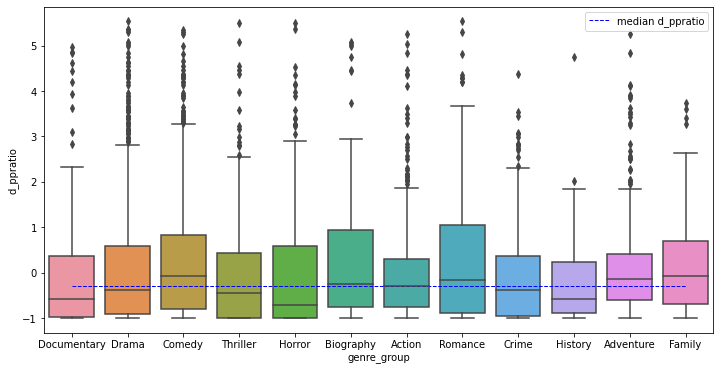

In [207]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='genre_group', y='d_ppratio', data=d_ppratio_xform)
plt.hlines(y=d_ppratio_xform.d_ppratio.median(), xmin=0, xmax=11, colors='blue', linestyles='dashed', lw=1, label='median d_ppratio')
plt.legend()
plt.show()

### Interesting results, but I'm not crazy about the non-normality of residuals.  Going to see what this looks like using Central Limit Theorum

In [214]:
x = 10000  # the number of samples taken
n = 50   # sample size

#for group in groups:

combined_sample_groups = []
for group in groups:
    # Correctly filter the DataFrame for the current group
    group_data = combined_df[combined_df['genre_group'] == group]['d_ppratio']
    
    # Generate the list of sample means
    sample_means = [np.mean(np.random.choice(group_data, size=n, replace=False)) for _ in range(x)]
    
    # Create a DataFrame from the sample means and assign the current group
    df = pd.DataFrame(sample_means, columns=['d_ppratio_means'])
    df['genre_group'] = group
    
    # Append the DataFrame to the list
    combined_sample_groups.append(df)

# Concatenate all the DataFrames outside the loop
combined_group_means = pd.concat(combined_sample_groups, ignore_index=True)

In [215]:
combined_group_means

,d_ppratio_means,genre_group
0,0.031721,Documentary
1,0.262849,Documentary
2,-0.278874,Documentary
3,0.248128,Documentary
4,0.531315,Documentary
...,...,...
119995,0.270116,Family
119996,0.014624,Family
119997,0.056706,Family
119998,0.244790,Family


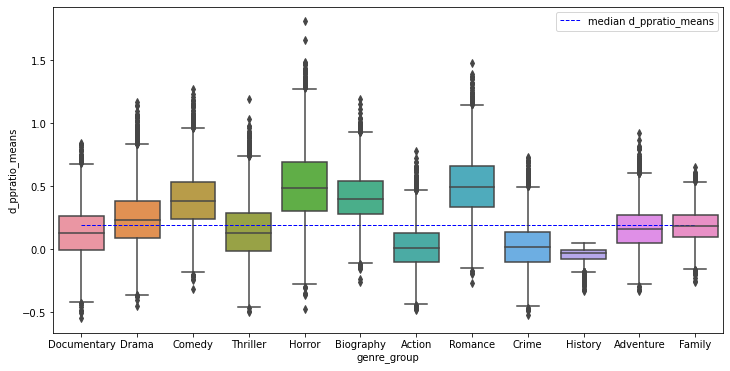

In [216]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='genre_group', y='d_ppratio_means', data=combined_group_means)
plt.hlines(y=combined_group_means.d_ppratio_means.median(), xmin=0, xmax=11, colors='blue', linestyles='dashed', lw=1, label='median d_ppratio_means')
plt.legend()
plt.show()

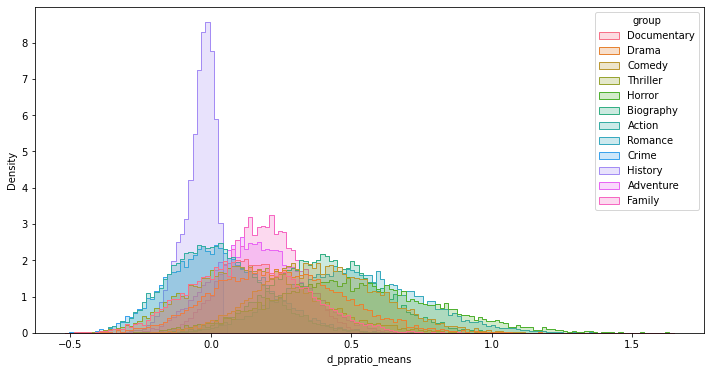

In [170]:
plt.figure(figsize=(12, 6))
sns.histplot(data=combined_group_means, x='d_ppratio_means', hue='group', element='step', stat='density', common_norm=False)

# Display the plot
plt.show()

In [171]:
# Fit the model
model = ols('d_ppratio_means ~ C(group)', data=combined_group_means).fit()

# Perform ANOVA
anova_results = sm.stats.anova_lm(model, typ=2)

print(anova_results)

               sum_sq        df            F  PR(>F)
C(group)  3933.866075      11.0  9292.247357     0.0
Residual  4617.893767  119988.0          NaN     NaN


In [172]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        d_ppratio_means   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     9292.
Date:                Tue, 18 Jun 2024   Prob (F-statistic):               0.00
Time:                        11:18:04   Log-Likelihood:                 25181.
No. Observations:              120000   AIC:                        -5.034e+04
Df Residuals:                  119988   BIC:                        -5.022e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

### I don't think this is stastically valid to do this test this way. What I don't get is why the Prob(Omnibus) and Prob(JB) are indicating that the data is not normal when it came from CLT above???

---

## Analyzing d_netprofit by genre group

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4058 entries, 0 to 4124
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   primary_title      4058 non-null   object 
 1   year               4058 non-null   float64
 2   runtime_minutes    4058 non-null   float64
 3   genres             4058 non-null   object 
 4   movie_id           4058 non-null   object 
 5   writer             3935 non-null   object 
 6   director           4048 non-null   object 
 7   production_budget  4058 non-null   float64
 8   studio             2464 non-null   object 
 9   averagerating      3942 non-null   float64
 10  numvotes           3942 non-null   float64
 11  actors             4058 non-null   object 
 12  d_netprofit        4058 non-null   float64
 13  d_ppratio          4058 non-null   float64
 14  genre_group        4058 non-null   object 
 15  log_d_ppratio      4058 non-null   float64
 16  sqrt_d_ppratio     4058 

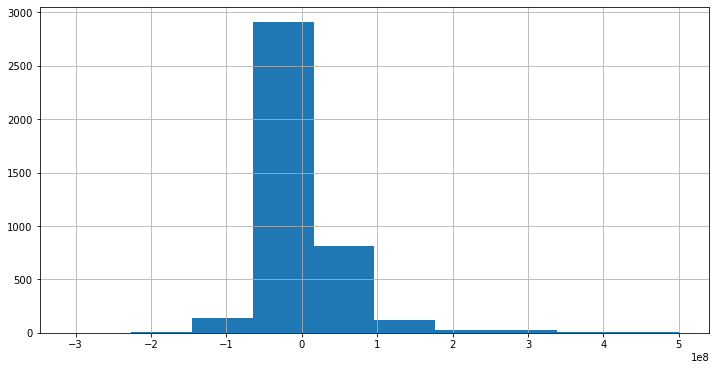

In [191]:
plt.figure(figsize=(12, 6))
combined_df.d_netprofit.hist();
combined_df.info()

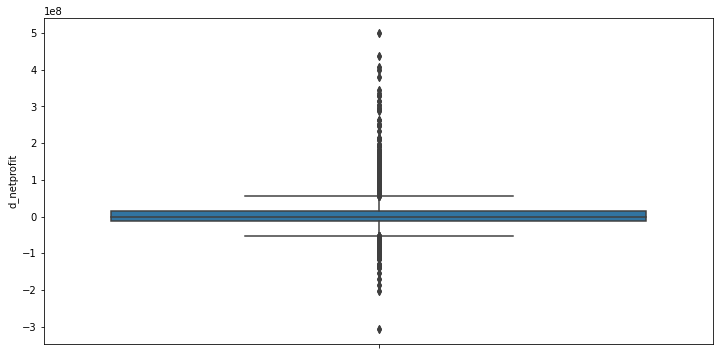

In [190]:
plt.figure(figsize=(12, 6))
sns.boxplot(y='d_netprofit', data=combined_df);

In [192]:
# IQR method
Q1 = combined_df.d_netprofit.quantile(0.25)
Q3 = combined_df.d_netprofit.quantile(0.75)
IQR = Q3 - Q1
iqr_df = combined_df[~((combined_df.d_netprofit < (Q1 - 1.5 * IQR)) | (combined_df.d_netprofit > (Q3 + 1.5 * IQR)))]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3504 entries, 0 to 4124
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   primary_title      3504 non-null   object 
 1   year               3504 non-null   float64
 2   runtime_minutes    3504 non-null   float64
 3   genres             3504 non-null   object 
 4   movie_id           3504 non-null   object 
 5   writer             3387 non-null   object 
 6   director           3494 non-null   object 
 7   production_budget  3504 non-null   float64
 8   studio             2023 non-null   object 
 9   averagerating      3399 non-null   float64
 10  numvotes           3399 non-null   float64
 11  actors             3504 non-null   object 
 12  d_netprofit        3504 non-null   float64
 13  d_ppratio          3504 non-null   float64
 14  genre_group        3504 non-null   object 
 15  log_d_ppratio      3504 non-null   float64
 16  sqrt_d_ppratio     3504 

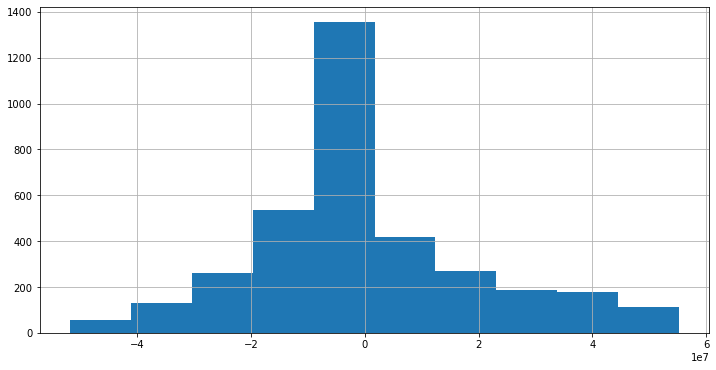

In [193]:
plt.figure(figsize=(12, 6))
iqr_df.d_netprofit.hist();
iqr_df.info()

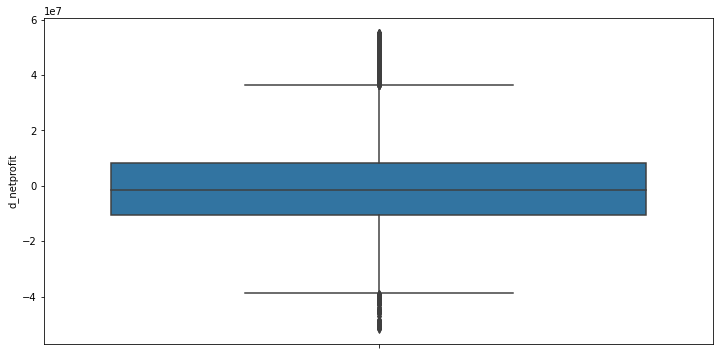

In [195]:
plt.figure(figsize=(12, 6))
sns.boxplot(y='d_netprofit', data=iqr_df);

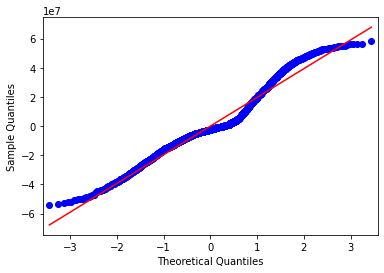

                      sum_sq      df         F    PR(>F)
C(genre_group)  1.666166e+16    11.0  3.893956  0.000013
Residual        1.358340e+18  3492.0       NaN       NaN
                            OLS Regression Results                            
Dep. Variable:            d_netprofit   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     3.894
Date:                Tue, 18 Jun 2024   Prob (F-statistic):           1.26e-05
Time:                        11:46:27   Log-Likelihood:                -63824.
No. Observations:                3504   AIC:                         1.277e+05
Df Residuals:                    3492   BIC:                         1.277e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                    coe

In [198]:
model = ols('d_netprofit ~ C(genre_group)', data=iqr_df).fit()

residuals = model.resid
# Create a Q-Q plot
fig = sm.qqplot(residuals, line='s')  # 's' indicates a standardized line
#plt.gca().set_ylim([-10, 20])   # set all qq plots to same y-scale for comparison

# Display the plot
plt.show()
anova_results = sm.stats.anova_lm(model, typ=2)

print(anova_results)
print(model.summary())

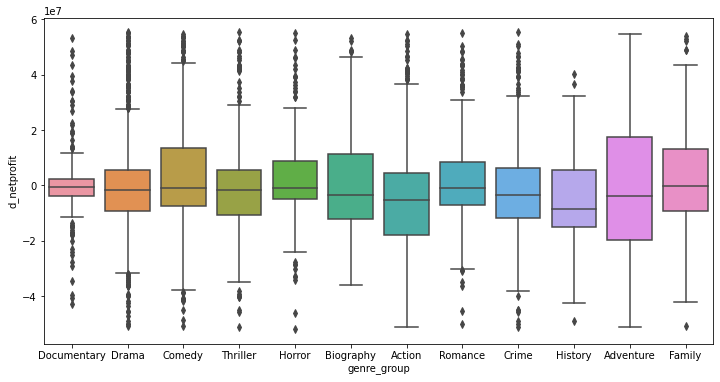

In [200]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='genre_group', y='d_netprofit', data=iqr_df);